In [7]:
from Model2 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import matplotlib.lines as mlines

In [8]:
warnings.simplefilter("ignore")

model = RiverDeltaModel()

pos = nx.spring_layout(model.G)


for j in range(10):
    model.step()

927


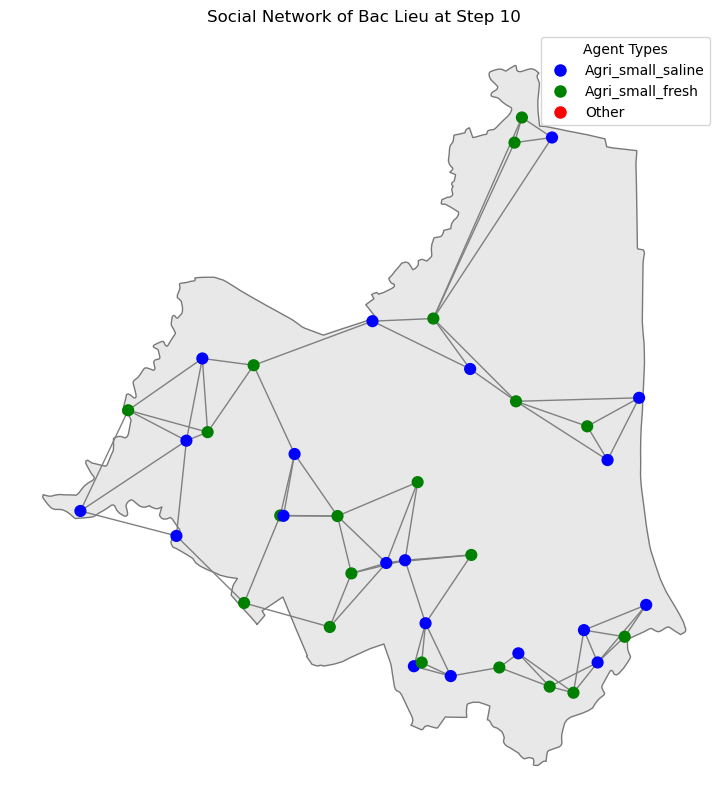

In [9]:
import matplotlib.lines as mlines

def plot_network(ax, model):
    ax.clear()

    # Plot province map
    model.polygon.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get the positions of the nodes and make a dictionary with the nodes and agents
    pos = nx.get_node_attributes(model.G, 'pos')

    node_to_agent = {}
    for agent in model.agents:
        node_to_agent[agent.node_id] = agent

    # Give each node a color, based on their agent type
    colors = []
    for node_id in model.G.nodes():
        agent = node_to_agent.get(node_id)  
        if agent:
            if agent.agent_type == "Agri_small_saline":
                colors.append('blue')
            elif agent.agent_type == "Agri_small_fresh":
                colors.append('green')
            else:
                colors.append('red')  
        else:
            colors.append("gray")  # something went wrong here, so the node is then gray

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Agri_small_saline')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Agri_small_fresh')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Other')
    ax.legend(handles=[blue_patch, green_patch, red_patch], loc='upper right', title='Agent Types')

    # Plot netwerk
    nx.draw(model.G, pos, node_color=colors, node_size=60, edge_color="gray", ax=ax)
    ax.set_title(f"Social Network of {model.province} at Step {model.steps}", fontsize=12)

# Call function above to plot the map
fig, ax = plt.subplots(figsize=(10, 10))
plot_network(ax, model)
plt.show()
